In [1]:
#pip install mlxtend

In [2]:
import numpy as np 
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('D:\downloads\groceries.xlsx' , header = None)
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')
# size of dataset 

There are 9835 rows and 32 columns


In [4]:
df
#Showing Dataset 
#Filled with NaN values 

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whipped/sour cream,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.fillna(0)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,tropical fruit,yogurt,coffee,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,whole milk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,pip fruit,yogurt,cream cheese,meat spreads,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,other vegetables,whole milk,condensed milk,long life bakery product,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whipped/sour cream,...,0,0,0,0,0,0,0,0,0,0
9831,cooking chocolate,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,...,0,0,0,0,0,0,0,0,0,0
9833,semi-finished bread,bottled water,soda,bottled beer,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.sample(10)
# Some random rows from dataset 

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
9373,oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1304,herbs,other vegetables,whole milk,butter,white bread,margarine,misc. beverages,hygiene articles,shopping bags,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9768,tropical fruit,pip fruit,root vegetables,yogurt,whipped/sour cream,cream cheese,bottled water,dental care,newspapers,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
541,frankfurter,rolls/buns,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6537,chicken,frozen vegetables,frozen dessert,bottled water,soda,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,whole milk,yogurt,brown bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2651,citrus fruit,other vegetables,whole milk,flour,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9710,bottled water,bottled beer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3388,berries,soda,long life bakery product,specialty chocolate,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4535,roll products,dog food,soda,fruit/vegetable juice,bottled beer,napkins,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
items = (df[0].unique())

for i in items:
    print(i)
    
#Finding unique items in column 1 (Mostly having all the unique items )

citrus fruit
tropical fruit
whole milk
pip fruit
other vegetables
rolls/buns
potted plants
beef
frankfurter
chicken
butter
fruit/vegetable juice
packaged fruit/vegetables
chocolate
specialty bar
butter milk
bottled water
yogurt
sausage
brown bread
hamburger meat
root vegetables
pork
pastry
canned beer
berries
coffee
misc. beverages
ham
turkey
curd cheese
red/blush wine
frozen potato products
flour
sugar
frozen meals
herbs
soda
detergent
grapes
processed cheese
fish
sparkling wine
newspapers
curd
pasta
popcorn
finished products
beverages
bottled beer
dessert
dog food
specialty chocolate
condensed milk
cleaner
white wine
meat
ice cream
hard cheese
cream cheese
liquor
pickled vegetables
liquor (appetizer)
UHT-milk
candy
onions
hair spray
photo/film
domestic eggs
margarine
shopping bags
salt
oil
whipped/sour cream
frozen vegetables
sliced cheese
dish cleaner
baking powder
specialty cheese
salty snack
Instant food products
pet care
white bread
female sanitary products
cling film/bags
soap
f

In [8]:
encoded_vals = []
for index, row in df.iterrows():
    labels = {}
    uncommons = list(set(items) - set(row))
    commons = list(set(items).intersection(row))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)
encoded_vals[0]
encod_df = pd.DataFrame(encoded_vals)

#Encoding values 

encod_df

,bottled water,specialty chocolate,salty snack,frozen chicken,liver loaf,meat spreads,yogurt,zwieback,bags,cream,...,white bread,red/blush wine,hair spray,bottled beer,specialty bar,spices,sauces,margarine,semi-finished bread,citrus fruit
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9833,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [9]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
count,9835,7676,6033,4734,3729,2874,2229,1684,1246,896,...,14,8,7,7,6,5,4,1,1,1
unique,158,151,155,153,150,137,138,140,128,120,...,13,7,6,7,5,4,3,1,1,1
top,sausage,whole milk,whole milk,whole milk,rolls/buns,soda,soda,shopping bags,soda,shopping bags,...,waffles,bottled beer,chocolate,long life bakery product,hygiene articles,napkins,house keeping products,skin care,hygiene articles,candles
freq,825,654,506,315,176,150,120,76,61,49,...,2,2,2,1,2,2,2,1,1,1


In [10]:
freq_items = fpgrowth(encod_df , min_support = 0.005 , use_colnames = True)
freq_items

,support,itemsets
0,0.082766,(citrus fruit)
1,0.058566,(margarine)
2,0.017692,(semi-finished bread)
3,0.139502,(yogurt)
4,0.104931,(tropical fruit)
...,...,...
995,0.005491,"(soda, meat)"
996,0.005084,"(meat, root vegetables)"
997,0.005287,"(sausage, meat)"
998,0.005287,"(yogurt, meat)"


In [11]:
most_popular_items=freq_items.sort_values('support',ascending=False)
most_popular_items = most_popular_items.head(15)
most_popular_items
#Top 15 most frequent items

,support,itemsets
6,0.255516,(whole milk)
9,0.193493,(other vegetables)
13,0.183935,(rolls/buns)
26,0.174377,(soda)
3,0.139502,(yogurt)
19,0.110524,(bottled water)
38,0.108998,(root vegetables)
4,0.104931,(tropical fruit)
46,0.098526,(shopping bags)
45,0.093950,(sausage)


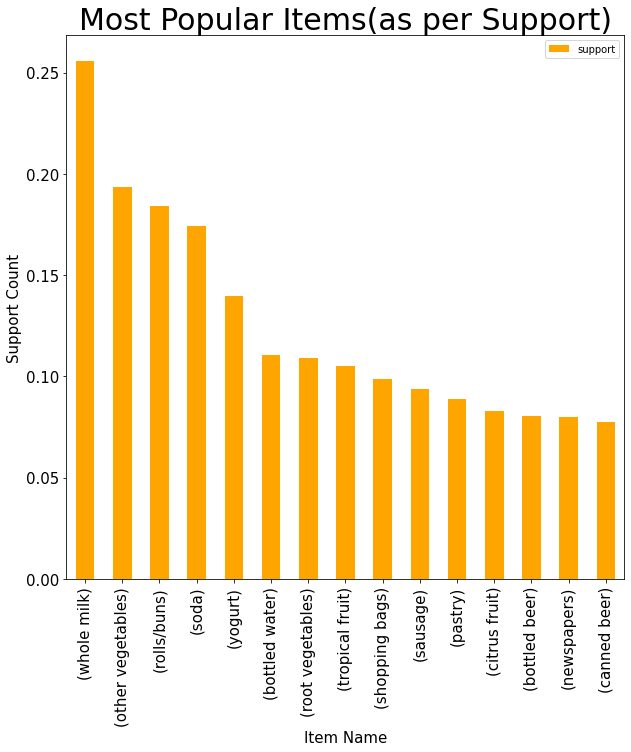

In [12]:
most_popular_items.values.tolist()

plt.rcParams['figure.figsize']=(10,10)
most_popular_items.plot.bar('itemsets','support',color='Orange')
plt.xlabel('Item Name',fontsize=15)
plt.ylabel('Support Count',fontsize=15)
plt.title('Most Popular Items(as per Support)',fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [13]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(freq_items, metric="confidence", min_threshold=0.05)
rules.head(100)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(whole milk),(citrus fruit),0.255516,0.082766,0.030503,0.119379,1.442377,0.009355,1.041577
1,(citrus fruit),(whole milk),0.082766,0.255516,0.030503,0.368550,1.442377,0.009355,1.179008
2,(yogurt),(citrus fruit),0.139502,0.082766,0.021657,0.155248,1.875752,0.010111,1.085803
3,(citrus fruit),(yogurt),0.082766,0.139502,0.021657,0.261671,1.875752,0.010111,1.165467
4,(tropical fruit),(citrus fruit),0.104931,0.082766,0.019929,0.189922,2.294702,0.011244,1.132280
...,...,...,...,...,...,...,...,...,...
95,"(rolls/buns, citrus fruit)",(other vegetables),0.016777,0.193493,0.005999,0.357576,1.848007,0.002753,1.255412
96,"(other vegetables, citrus fruit)",(rolls/buns),0.028876,0.183935,0.005999,0.207746,1.129456,0.000688,1.030055
97,"(rolls/buns, other vegetables)",(citrus fruit),0.042603,0.082766,0.005999,0.140811,1.701328,0.002473,1.067559
98,(citrus fruit),"(rolls/buns, other vegetables)",0.082766,0.042603,0.005999,0.072482,1.701328,0.002473,1.032214


In [14]:
association_confi=association_rules(freq_items,metric='confidence',min_threshold=0.05)
a_confi_top=association_confi.sort_values('confidence',ascending=False)
a_confi_top.drop(['antecedent support','consequent support'],axis=1).head(20)

,antecedents,consequents,support,confidence,lift,leverage,conviction
342,"(tropical fruit, yogurt, root vegetables)",(whole milk),0.005694,0.700000,2.739554,0.003616,2.481613
528,"(pip fruit, other vegetables, root vegetables)",(whole milk),0.005491,0.675000,2.641713,0.003412,2.290720
713,"(butter, whipped/sour cream)",(whole milk),0.006711,0.660000,2.583008,0.004113,2.189659
2054,"(pip fruit, whipped/sour cream)",(whole milk),0.005999,0.648352,2.537421,0.003635,2.117126
657,"(yogurt, butter)",(whole milk),0.009354,0.638889,2.500387,0.005613,2.061648
703,"(butter, root vegetables)",(whole milk),0.008236,0.637795,2.496107,0.004936,2.055423
950,"(tropical fruit, curd)",(whole milk),0.006507,0.633663,2.479936,0.003883,2.032240
80,"(whole milk, root vegetables, citrus fruit)",(other vegetables),0.005796,0.633333,3.273165,0.004025,2.199566
454,"(yogurt, pip fruit, other vegetables)",(whole milk),0.005084,0.625000,2.446031,0.003005,1.985291
2259,"(pip fruit, domestic eggs)",(whole milk),0.005389,0.623529,2.440275,0.003181,1.977536


In [15]:
#pip install matplotlib

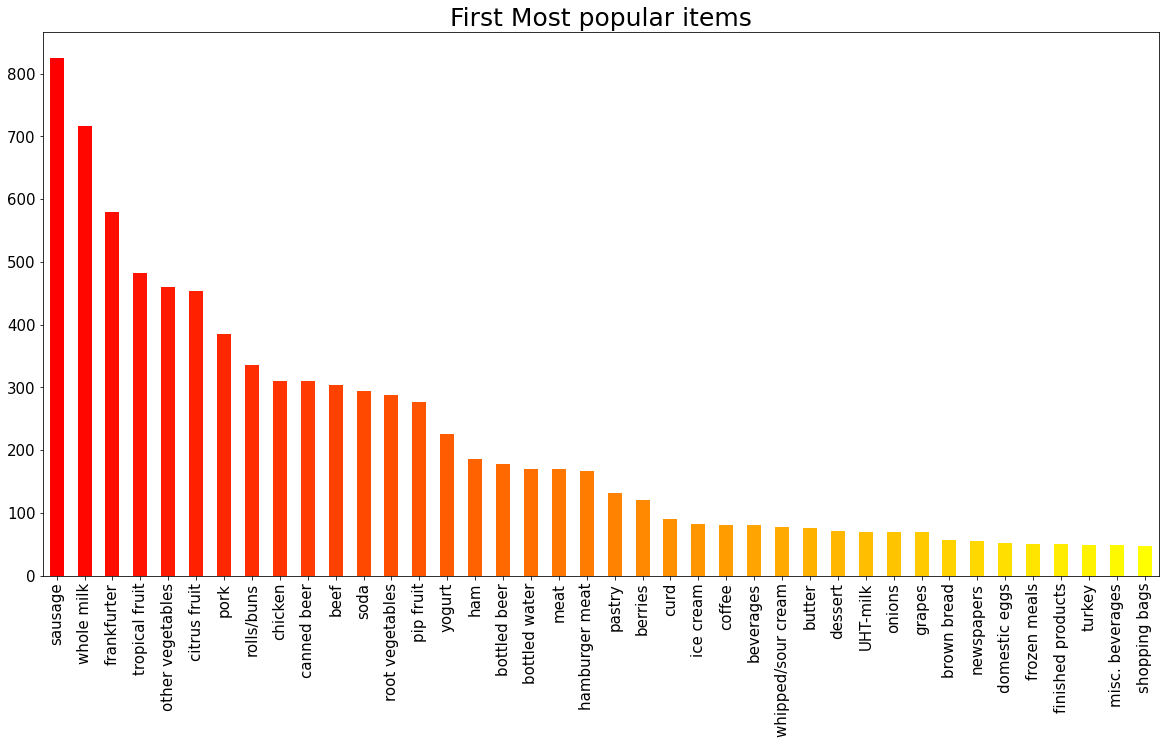

In [18]:
plt.rcParams['figure.figsize'] = (20, 10)
color = plt.cm.autumn(np.linspace(0, 1, 40))
df[0].value_counts().head(40).plot.bar(color = color)
plt.title('First Most popular items', fontsize = 25)
plt.xticks(rotation = 90 , fontsize = 15)
plt.yticks(fontsize = 15)
#plt.grid()

plt.show()

In [28]:
file = pd.ExcelWriter('Desktop\Rules.xlsx')
a_confi_top.drop(['antecedent support','consequent support','leverage','conviction'],axis=1).head(100).to_excel(file)
# assocn_rules_conf['consequents'].to_excel(file)

file.save()

In [20]:
# association_confi=association_rules(freq_items,metric='confidence',min_threshold=0.2)
# a_confi_top=association_confi.sort_values('confidence',ascending=False)
# a_confi_top.drop(['antecedent support','consequent support'],axis=1).head(10)

In [24]:
association_supp=association_rules(freq_items,metric='support',min_threshold=0.05)
a_supp_top=association_supp.sort_values('support',ascending=False)
a_supp_top.drop(['antecedent support','consequent support'],axis=1).head()

,antecedents,consequents,support,confidence,lift,leverage,conviction
2,(whole milk),(other vegetables),0.074835,0.292877,1.513634,0.025394,1.140548
3,(other vegetables),(whole milk),0.074835,0.386758,1.513634,0.025394,1.214013
4,(whole milk),(rolls/buns),0.056634,0.221647,1.205032,0.009636,1.048452
5,(rolls/buns),(whole milk),0.056634,0.307905,1.205032,0.009636,1.075696
0,(whole milk),(yogurt),0.056024,0.219260,1.571735,0.020379,1.102157


In [25]:
association_lift=association_rules(freq_items,metric='lift',min_threshold=3)
a_lift_top=association_lift.sort_values('lift',ascending=False)
a_lift_top.drop(['antecedent support','consequent support'],axis=1).head(20)

,antecedents,consequents,support,confidence,lift,leverage,conviction
53,"(tropical fruit, whole milk)","(yogurt, root vegetables)",0.005694,0.134615,5.212371,0.004602,1.125712
58,"(yogurt, root vegetables)","(tropical fruit, whole milk)",0.005694,0.220472,5.212371,0.004602,1.228567
55,"(tropical fruit, root vegetables)","(whole milk, yogurt)",0.005694,0.270531,4.828814,0.004515,1.294059
56,"(whole milk, yogurt)","(tropical fruit, root vegetables)",0.005694,0.101633,4.828814,0.004515,1.089703
93,"(whole milk, other vegetables)","(pip fruit, root vegetables)",0.005491,0.073370,4.716272,0.004326,1.062390
90,"(pip fruit, root vegetables)","(whole milk, other vegetables)",0.005491,0.352941,4.716272,0.004326,1.429801
204,(ham),(white bread),0.005084,0.195312,4.639851,0.003988,1.190407
205,(white bread),(ham),0.005084,0.120773,4.639851,0.003988,1.107758
43,"(tropical fruit, root vegetables)","(whole milk, other vegetables)",0.007016,0.333333,4.454257,0.005441,1.387748
46,"(whole milk, other vegetables)","(tropical fruit, root vegetables)",0.007016,0.093750,4.454257,0.005441,1.080224
